In [1]:
import wavecalc as wc
import numpy as np
from math import pi
import matplotlib.pyplot as pl
import os

Importing wavecalc.classes as obj 
Importing wavecalc.functions as fun 
Working in a development branch of wavecalc


In [2]:
import matplotlib.pyplot as pl

In [15]:
pwd

'/Users/ryan/git/wavecalc'

In [5]:
a=wc.composites.prism(wc.materials.ktp(),90)

In [6]:
a.norm1

array([[ 0.        ],
       [-0.70710678],
       [ 0.70710678]])

In [7]:
a.norm2

array([[0.        ],
       [0.70710678],
       [0.70710678]])

In [9]:
a.material

array([[3.02038842, 0.        , 0.        ],
       [0.        , 3.04665855, 0.        ],
       [0.        , 0.        , 3.34768855]])

In [7]:
np.sqrt(3.0065 + 0.03901 / ( 1.064**2 - 0.04251) - 0.01327*1.064**2)

1.7399079502434365

In [8]:
np.sqrt(3.0333 + 0.04154 / ( 1.064**2 - 0.04547) - 0.01408*1.064**2)

1.7480241739802462

In [9]:
a= 3.29100+ (0.04140/(1.064**2-0.03978))+(9.35522/(1.064**2-31.45571))
np.sqrt(a)

1.7379264717305054

In [10]:
b=  3.45018 + (0.04341/(1.064**2-0.04597))+(16.98825/(1.064**2-39.43799))
np.sqrt(b) 

1.7454680019979687

In [3]:
ktp = wc.materials.ktp()
ktp.epsilon

array([[3.02038842, 0.        , 0.        ],
       [0.        , 3.04665855, 0.        ],
       [0.        , 0.        , 3.34768855]])

In [4]:
np.sqrt(ktp.epsilon)

array([[1.73792647, 0.        , 0.        ],
       [0.        , 1.745468  , 0.        ],
       [0.        , 0.        , 1.82966897]])

In [5]:
a = None
b =a 

In [6]:
b

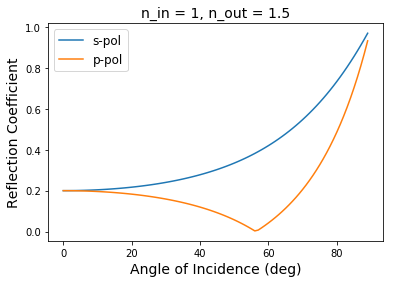

In [50]:
wav_s = wc.obj.wave(pol='x')
wav_p = wc.obj.wave(pol='y')
surf = wc.obj.surface()
med = wc.obj.medium(ep_all=2.25)
surf = surf + med

thetas = np.linspace(0,89,90)

Refls_s = []
Refls_p = []

for t in thetas:

    wav_s.rotate(t,'x')
    wav_p.rotate(t,'x')
    
    #out_s = wc.fun.crash(wav_s,surf)
    #out_p = wc.fun.crash(wav_p,surf)
    
    out_s = wav_s@surf
    out_p = wav_p@surf
    
    #print(t,len(out_s),len(out_p))
    
    out_s = out_s[0]
    out_p = out_p[0]
    
    refl_s = out_s.amp()
    refl_p = out_p.amp()
    
    Refls_s.append(refl_s)
    Refls_p.append(refl_p)
    
    wav_s.rotate(-t,'x')
    wav_p.rotate(-t,'x')
    
Refls_s = np.asarray(Refls_s)
Refls_p = np.asarray(Refls_p)
    
fig = pl.figure()
pl.plot(thetas,Refls_s,label='s-pol')
pl.plot(thetas,Refls_p,label='p-pol')
pl.title("n_in = 1, n_out = 1.5",fontsize=14)
pl.xlabel("Angle of Incidence (deg)",fontsize=14)
pl.ylabel("Reflection Coefficient",fontsize=14)
pl.legend(fontsize=12)
#pl.grid(True)
fig.savefig('test_plots/reflection_coeffs_example.png',bbox_inches='tight')
pl.show()

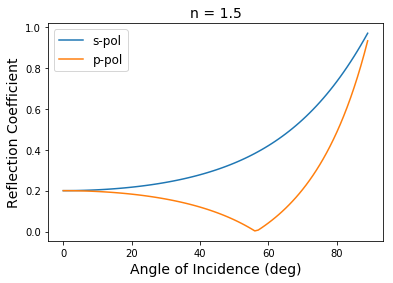

In [7]:
pl.plot(thetas,Refls_s,label='s-pol')
pl.plot(thetas,Refls_p,label='p-pol')
pl.title("n = 1.5",fontsize=14)
pl.xlabel("Angle of Incidence (deg)",fontsize=14)
pl.ylabel("Reflection Coefficient",fontsize=14)
pl.legend(fontsize=12)
pl.show()

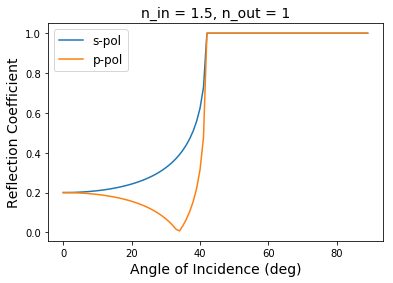

In [26]:
wav_s = wc.obj.wave(pol='x')
wav_p = wc.obj.wave(pol='y')
surf = wc.obj.surface()
med = wc.obj.medium(ep_all=2.25)
surf = med + surf
wav_s = wav_s + med
wav_p = wav_p + med
wav_s.fixmode()
wav_p.fixmode()

thetas = np.linspace(0,89,90)

Refls_s = []
Refls_p = []

for t in thetas:

    wav_s.rotate(t,'x')
    wav_p.rotate(t,'x')
    
    #out_s = wc.fun.crash(wav_s,surf)
    #out_p = wc.fun.crash(wav_p,surf)
    
    out_s = wav_s@surf
    out_p = wav_p@surf
    
    #print(t,len(out_s),len(out_p))
    
    out_s = out_s[0]
    out_p = out_p[0]
    
    refl_s = out_s.amp()
    refl_p = out_p.amp()
    
    Refls_s.append(refl_s)
    Refls_p.append(refl_p)
    
    wav_s.rotate(-t,'x')
    wav_p.rotate(-t,'x')
    
Refls_s = np.asarray(Refls_s)
Refls_p = np.asarray(Refls_p)
    
fig = pl.figure()
pl.plot(thetas,Refls_s,label='s-pol')
pl.plot(thetas,Refls_p,label='p-pol')
pl.title("n_in = 1.5, n_out = 1",fontsize=14)
pl.xlabel("Angle of Incidence (deg)",fontsize=14)
pl.ylabel("Reflection Coefficient",fontsize=14)
pl.legend(fontsize=12)
#pl.grid(True)
pl.show()
#fig.savefig('test_plots/total_internal_reflection_example.png',bbox_inches='tight')

In [12]:
(180/pi)*np.arcsin(1/1.5)

41.810314895778596

In [13]:
wav_s = wc.obj.wave(pol='x')
wav_p = wc.obj.wave(pol='y')
surf = wc.obj.surface()
med = wc.obj.medium(ep_all=2.25)
surf = surf + med

thetas = np.linspace(0,89,90)

wav_s.rotate(87,'x')
wav_p.rotate(87,'x')
    
out_s = wc.fun.crash(wav_s,surf,verbose=True)[0]
out_p = (wav_p @ surf)[0]
    
refl_s = out_s.amp()
refl_p = out_p.amp()

Assuming k0 = 1
x' = [[ 0. -1.  0.]]
y' = [[ 1.  0. -0.]]
z' = [[0. 0. 1.]]
k_hat . s_hat =  0.05233595624294397
U =  [[ 0.  1.  0.]
 [-1.  0.  0.]
 [ 0. -0.  1.]]
Uinv =  [[-0. -1. -0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]]
DELTA_r = 0.0
SIGMA_r = (-0.005478104631726932+0j)
PSI_r = 0j
GAMMA_r = (7.502407589177196e-06+0j)
DELTA_t = 0.0
SIGMA_t = (-5.637325735421386+0j)
PSI_t = 0j
GAMMA_t = (3.5310490496938076+0j)
Quartic roots are approximated as:  [(-0.052335956243535625+1.1311690577260623e-07j), (-0.05233595624259915-1.1311690577709927e-07j), (1.119258259880485-2.8721408321569124e-08j), (1.1192582598851066+2.8721408584786445e-08j)]
k_alpha =  [[ 0.        +0.00000000e+00j -0.99862953+0.00000000e+00j
  -0.05233596-1.13116906e-07j]]
k_ beta =  [[ 0.        +0.00000000e+00j -0.99862953+0.00000000e+00j
  -0.05233596+1.13116906e-07j]]
k_gamma =  [[ 0.        +0.00000000e+00j -0.99862953+0.00000000e+00j
   1.11925826-2.87214083e-08j]]
k_ nu =  [[ 0.        +0.00000000e+00j -0.99862953+0.00000000e

In [12]:
refl_s

0.0

In [7]:
out_s.kvec

array([[ 0.        +0.00000000e+00j],
       [-0.99862953+0.00000000e+00j],
       [-0.05233596-1.13116906e-07j]])

In [3]:
wav_s = wc.obj.wave(pol='x')
wav_p = wc.obj.wave(pol='y')
surf = wc.obj.surface()
med = wc.obj.medium(ep_all=2.25)
surf = surf + med


wav_s.rotate(0.,'x')
wav_p.rotate(0.,'x')
    
out_s = wc.fun.crash(wav_s,surf,verbose=True)
out_p = wc.fun.crash(wav_p,surf)

Assuming k0 = 1
x' = [[1. 0. 0.]]
y' = [[0. 1. 0.]]
z' = [[0. 0. 1.]]
k_hat . s_hat =  1.0
U =  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Uinv =  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
DELTA_r = 0.0
SIGMA_r = (-2+0j)
PSI_r = 0j
GAMMA_r = (1+0j)
DELTA_t = 0.0
SIGMA_t = (-10.125+0j)
PSI_t = 0j
GAMMA_t = (11.390625+0j)
Quartic roots are approximated as:  [-1.0000000036332495, -0.9999999963667489, 1.4999999572855278, 1.5000000427144764]
k_alpha =  [[ 0.  0. -1.]]
k_ beta =  [[ 0.  0. -1.]]
k_gamma =  [[0.         0.         1.49999996]]
k_ nu =  [[0.         0.         1.50000004]]
eigenvalue should be: 0.9999999927334977
eigenvalues approximated as: [1.         1.         1.99999999]
over*under =  [1. 1. 0.]
eigenvalue should be: 1.000000007266499
eigenvalues approximated as: [1.         1.         2.00000001]
over*under =  [1. 1. 0.]
eigenvalue should be: 2.2499998718565855
eigenvalues approximated as: [2.25       2.25       4.49999987]
over*under =  [1. 1. 0.]
eigenvalue should be: 2.250000128

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [4]:
-0.j*np.array([[0.,1.,0.]]).T

array([[0.-0.j],
       [0.-0.j],
       [0.-0.j]])

In [7]:
a = -0.j*np.array([[0.,1.,0.]]).T
really = np.isreal(a).all()
if really:
    a = np.asarray(a,dtype=float)
        
a

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


array([[0.],
       [0.],
       [0.]])

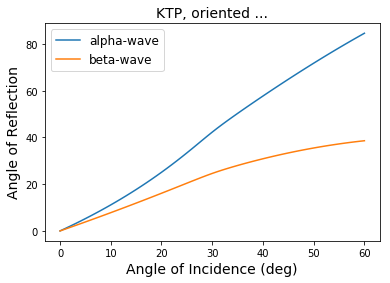

In [5]:
wav = wc.obj.wave(efield=False)
surf = wc.obj.surface()
med = wc.obj.medium(epx=1.4**2,epy=1.9**2,epz=2.4**2)#wc.materials.ktp()
med.rotate(45,'x')
med.rotate(45,'y')
med.rotate(45,'z')
surf = med + surf
wav = wav + med

thetas = np.linspace(0,60,61)

Ang_a = []
Ang_b = []

for t in thetas:

    wav.rotate(t,'x')
    wav.fixmode()
    
    out = wav@surf
    
    out_a = out[0]
    out_b = out[1]
    
    k_a = out_a.kvec
    k_b = out_b.kvec
    
    ang_a = np.arctan(k_a[1,0]/k_a[2,0])
    ang_b = np.arctan(k_b[1,0]/k_b[2,0])
    
    ang_a = (180/pi)*ang_a
    ang_b = (180/pi)*ang_b
    
    Ang_a.append(ang_a)
    Ang_b.append(ang_b)
    
    wav.rotate(-t,'x')
    
Ang_a = np.asarray(Ang_a)
Ang_b = np.asarray(Ang_b)
    
fig = pl.figure()
pl.plot(thetas,Ang_a,label='alpha-wave')
pl.plot(thetas,Ang_b,label='beta-wave')
pl.title("nx=1.4, ny=1.9, nz=2.4, ",fontsize=14)
pl.xlabel("Angle of Incidence (deg)",fontsize=14)
pl.ylabel("Angle of Reflection",fontsize=14)
pl.legend(fontsize=12)
#pl.grid(True)
#fig.savefig('test_plots/reflection_coeffs_example.png',bbox_inches='tight')
pl.show()

In [5]:
wav_p.efield

array([[0.],
       [1.],
       [0.]])

In [6]:
out_s[0].kvec, out_s[1].kvec

(array([[ 0.],
        [ 0.],
        [-1.]]), array([[ 0.],
        [ 0.],
        [-1.]]))

In [7]:
out_s[0].efield, out_s[1].efield

(array([[ 0.],
        [ 0.],
        [-1.]]), array([[ 0.],
        [ 0.],
        [-1.]]))

In [29]:
out_s.efield

array([[ 0.],
       [ 0.],
       [-1.]])

In [27]:
out_p.pol()

array([[ 0.],
       [ 0.],
       [-1.]])

In [28]:
out_p.efield

array([[ 0.],
       [ 0.],
       [-1.]])

In [13]:
out_s.amp()**2

0.0402608238010001

In [5]:
Refls_p

[4.0,
 0.039983747548440994,
 0.03993500869921131,
 0.0398537465768352,
 0.0397399534892254,
 0.039593587298373006,
 4.000000034118326,
 0.039202963414607696,
 0.0389586049915816,
 0.0386814717975707,
 0.03837147985569601,
 0.03802857522194,
 0.03765268712573,
 3.999999993856827,
 4.000000037423371,
 0.0363264523891491,
 3.999999963557702,
 3.999999981586,
 0.034701281177023494,
 0.034093015277988505,
 3.9999999849923356,
 0.03277685540681371,
 0.03206912291601299,
 0.03132847695096889,
 0.030555118632678093,
 0.029749331621455398,
 4.000000001919139,
 0.028041899851458,
 4.000000004660471,
 0.026210047798779897,
 0.025249145488797604,
 0.024259439416062498,
 0.0232420015907291,
 0.0221981090918534,
 0.021129244518161002,
 0.020037130966574796,
 0.018923770646045,
 0.017791473887472504,
 0.016642902919156898,
 4.000000036001925,
 3.999999931074694,
 0.013132249773055998,
 0.0119537468010724,
 0.010779225441199402,
 0.009614566577646502,
 0.008466458206185802,
 0.007342482420846399,
 0.

In [4]:
.5/(2.5)

0.2

In [6]:
thetas = np.linspace(0,10,11)
for t in thetas:
    print(t)
    print(isinstance(t,(int,float)))

0.0
True
1.0
True
2.0
True
3.0
True
4.0
True
5.0
True
6.0
True
7.0
True
8.0
True
9.0
True
10.0
True


In [45]:
a = np.array([[1.,0.,0.]]).T
b = wc.fun.rotate(a,0.00114595,'y')
c =(b - a)
d = b+a
(c.T @ c)/(d.T @d)

array([[1.00006006e-10]])

In [46]:
0.00114595*60*60

4.12542

In [47]:
0.00114595*(pi/180)

2.0000600563229018e-05

In [48]:
20e-6

2e-05